<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [25]:
!pip install pandas

In [26]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [27]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()



--2025-08-04 17:05:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  44.3MB/s    in 3.5s    

2025-08-04 17:05:34 (43.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [28]:
import sqlite3
conn = sqlite3.connect("survey-data.sqlite")
df.to_sql("main", conn, if_exists="replace", index=False)


65437

### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



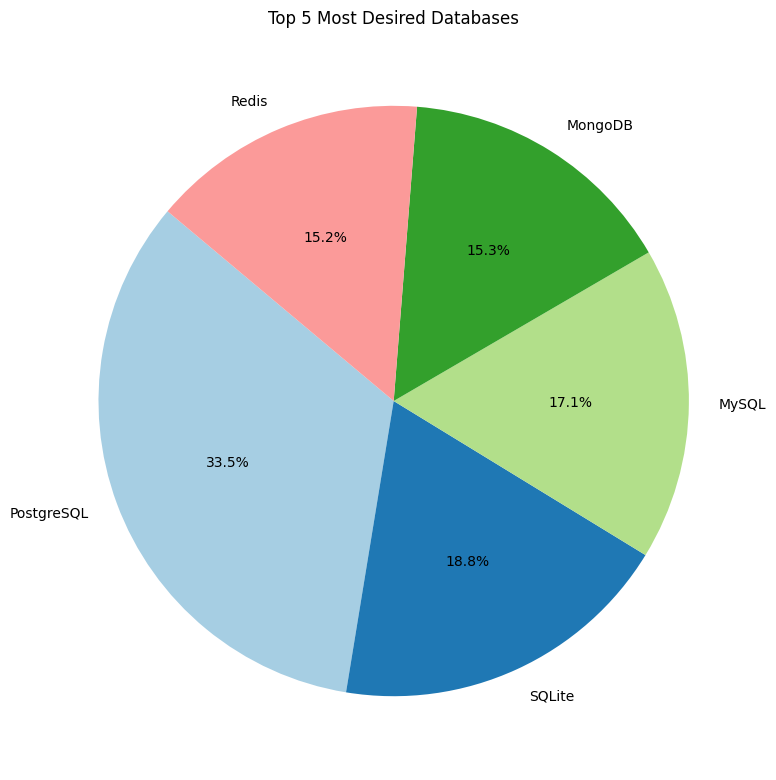

In [29]:
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

df_exploded = df.assign(Database=df['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

top_databases = df_exploded['Database'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Most Desired Databases')
plt.tight_layout()
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



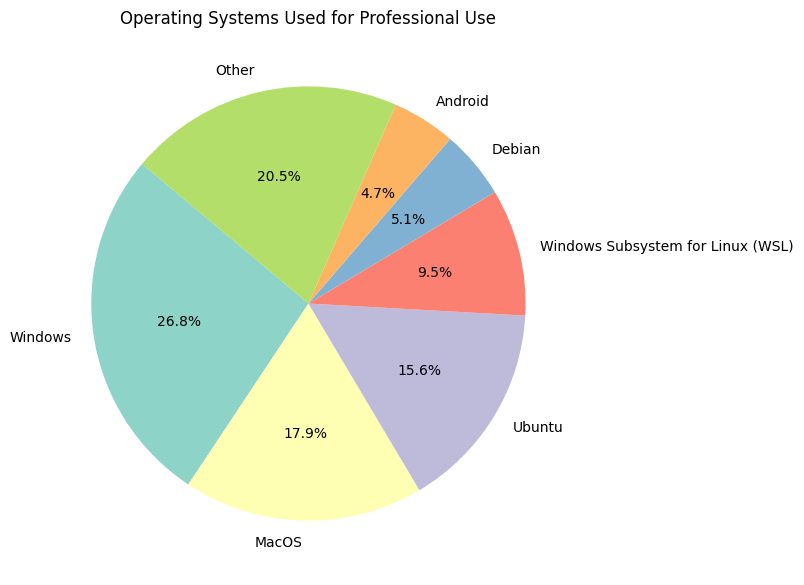

In [30]:
query = """
SELECT [OpSysProfessional use]
FROM main
WHERE [OpSysProfessional use] IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
df_exploded = df.assign(OS=df['OpSysProfessional use'].str.split(';')).explode('OS')

os_counts = df_exploded['OS'].value_counts()

top_n = 6
top_os = os_counts[:top_n]
others = os_counts[top_n:].sum()
if others > 0:
    top_os["Other"] = others

plt.figure(figsize=(8, 8))
plt.pie(top_os, labels=top_os.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Operating Systems Used for Professional Use')
plt.tight_layout()
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



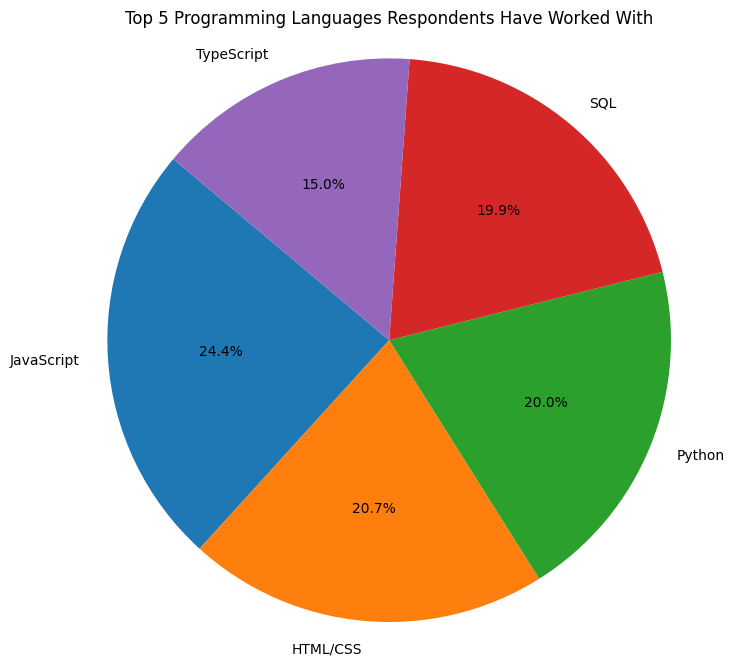

In [31]:
query = """
SELECT LanguageHaveWorkedWith
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL
"""
df_lang = pd.read_sql_query(query, conn)

df_lang = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
top_languages = df_lang['Language'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Programming Languages Respondents Have Worked With')
plt.axis('equal')
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



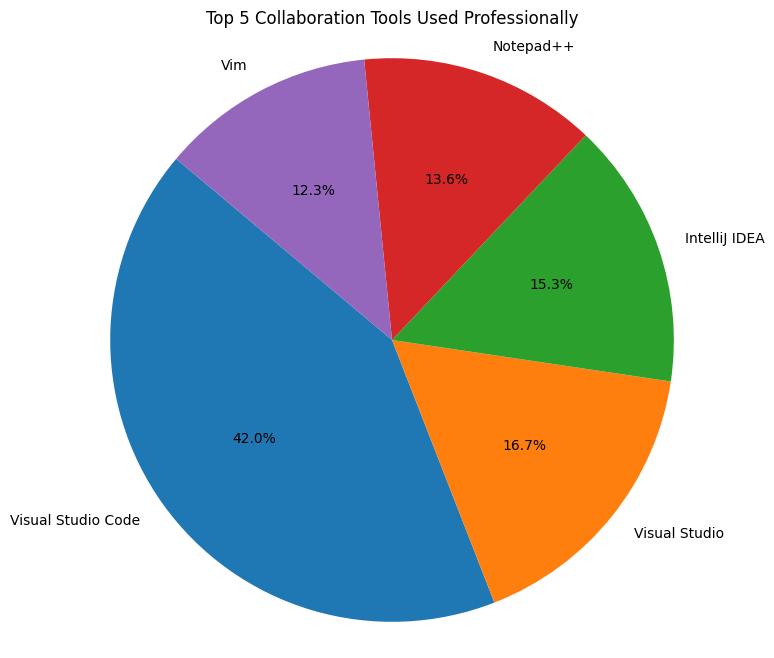

In [32]:

query = """
SELECT NEWCollabToolsHaveWorkedWith
FROM main
WHERE NEWCollabToolsHaveWorkedWith IS NOT NULL
"""
df_tools = pd.read_sql_query(query, conn)

df_tools = df_tools.assign(Tool=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

top_tools = df_tools['Tool'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_tools, labels=top_tools.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Collaboration Tools Used Professionally')
plt.axis('equal')
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



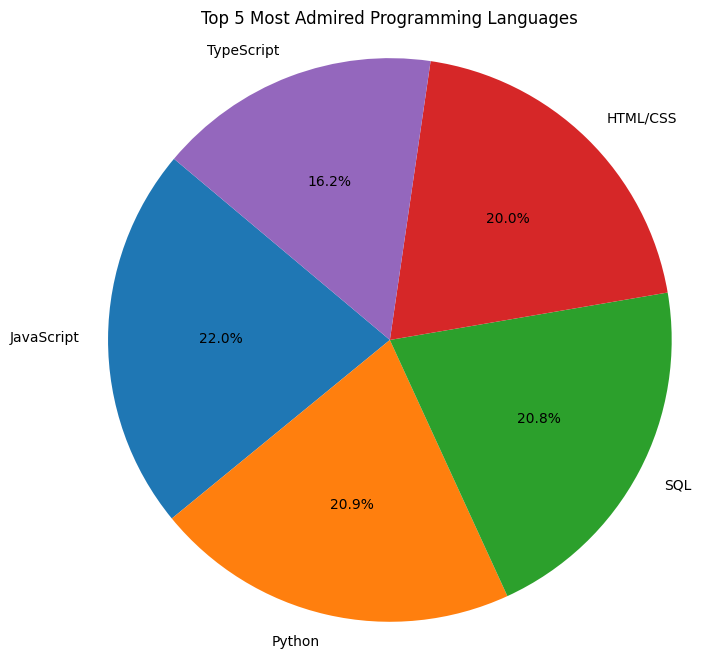

In [33]:

query = """
SELECT LanguageAdmired
FROM main
WHERE LanguageAdmired IS NOT NULL
"""
df_admired = pd.read_sql_query(query, conn)
df_admired = df_admired.assign(Language=df_admired['LanguageAdmired'].str.split(';')).explode('Language')
top_admired = df_admired['Language'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_admired, labels=top_admired.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Admired Programming Languages')
plt.axis('equal')
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



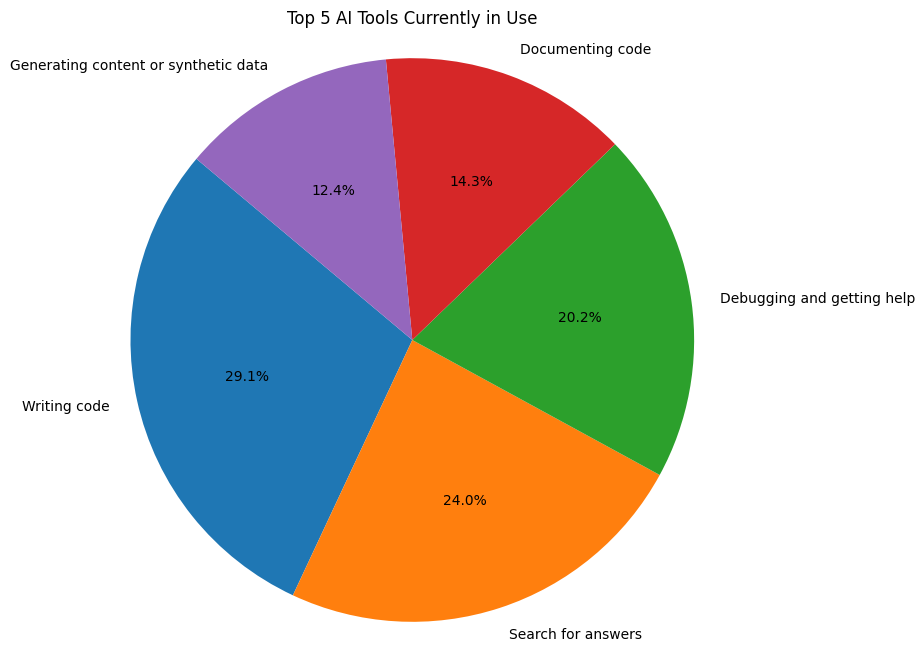

In [34]:
query = """
SELECT "AIToolCurrently Using"
FROM main
WHERE "AIToolCurrently Using" IS NOT NULL
"""
df_ai = pd.read_sql_query(query, conn)

df_ai = df_ai.assign(Tool=df_ai["AIToolCurrently Using"].str.split(';')).explode('Tool')
df_ai['Tool'] = df_ai['Tool'].str.strip()  # Clean up extra spaces

top_ai_tools = df_ai['Tool'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_ai_tools, labels=top_ai_tools.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 AI Tools Currently in Use')
plt.axis('equal')
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



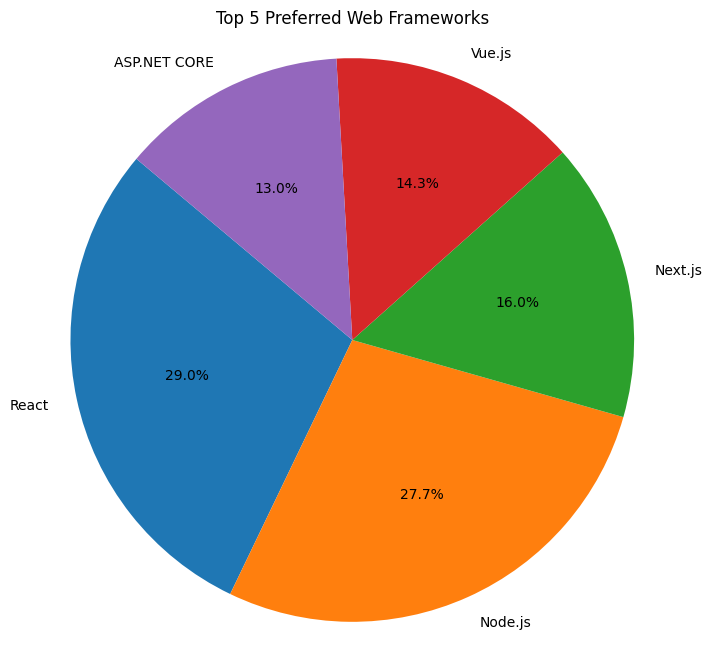

In [35]:
query = """
SELECT WebframeWantToWorkWith
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL
"""
df_web = pd.read_sql_query(query, conn)

df_web = df_web.assign(Framework=df_web['WebframeWantToWorkWith'].str.split(';')).explode('Framework')
df_web['Framework'] = df_web['Framework'].str.strip()  # Clean whitespace

top_frameworks = df_web['Framework'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_frameworks, labels=top_frameworks.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Preferred Web Frameworks')
plt.axis('equal')
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



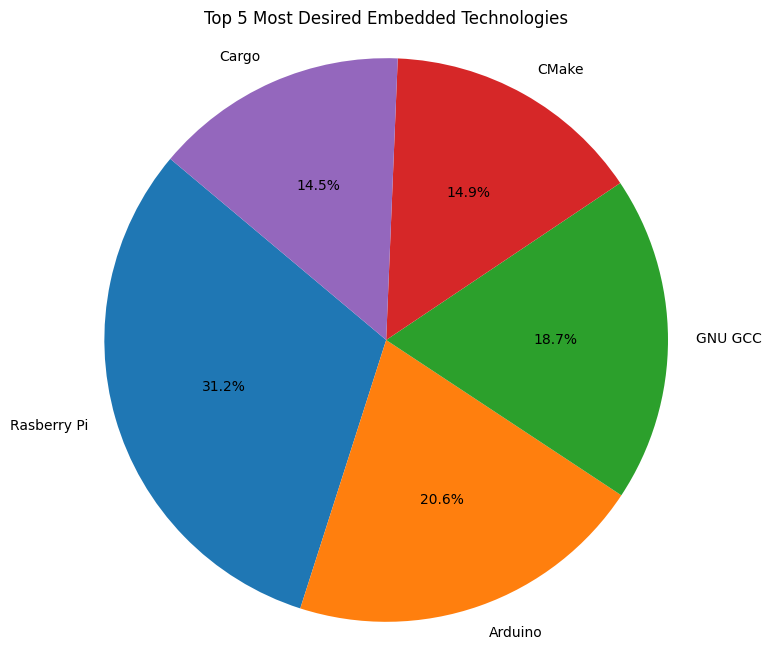

In [36]:
query = """
SELECT EmbeddedWantToWorkWith
FROM main
WHERE EmbeddedWantToWorkWith IS NOT NULL
"""
df_embed = pd.read_sql_query(query, conn)

df_embed = df_embed.assign(EmbeddedTech=df_embed['EmbeddedWantToWorkWith'].str.split(';')).explode('EmbeddedTech')
df_embed['EmbeddedTech'] = df_embed['EmbeddedTech'].str.strip()  # Clean up whitespace

top_embedded = df_embed['EmbeddedTech'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_embedded, labels=top_embedded.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Desired Embedded Technologies')
plt.axis('equal')
plt.show()


In [38]:
conn.close()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
